In [1]:
# First i will import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# here i will load dataset

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


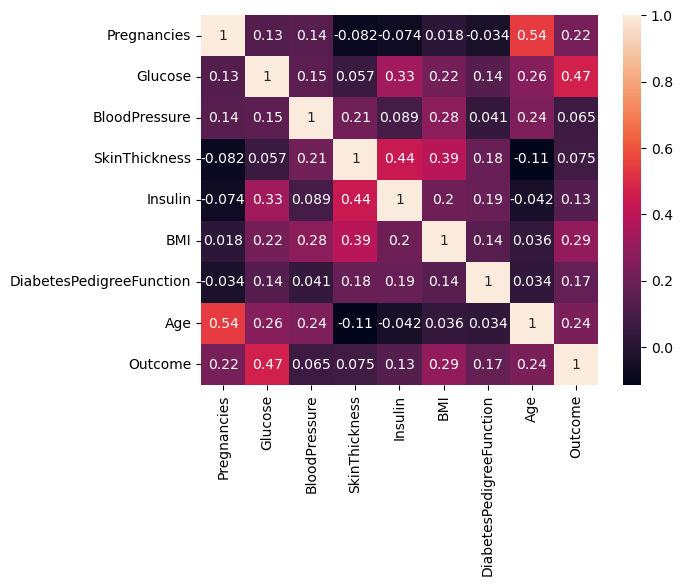

In [3]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


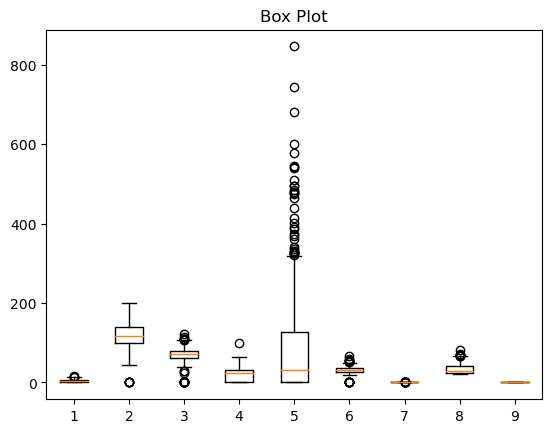

In [5]:
# Here we will check the outliers in our dataset
plt.boxplot(df)
plt.title("Box Plot")
plt.show()

In [6]:
# here i can see outliers in dataset so we will deal with it

data = df[["BloodPressure","Insulin","BMI","Age"]]

median = data.median()

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
higher_bound=Q3 + 1.5 * IQR

df[["Bloodpressure","insulin","bmi","age"]] = data.apply(lambda x : x.mask((x < lower_bound[x.name]) | (x > higher_bound[x.name]), median[x.name]))





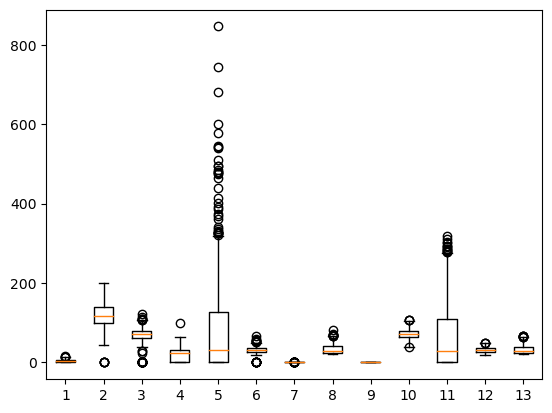

In [7]:
plt.boxplot(df)
plt.show()

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Bloodpressure,insulin,bmi,age
0,6,148,72,35,0,33.6,0.627,50,1,72,0.0,33.6,50
1,1,85,66,29,0,26.6,0.351,31,0,66,0.0,26.6,31
2,8,183,64,0,0,23.3,0.672,32,1,64,0.0,23.3,32
3,1,89,66,23,94,28.1,0.167,21,0,66,94.0,28.1,21
4,0,137,40,35,168,43.1,2.288,33,1,40,168.0,43.1,33


In [9]:
columns_to_drop=["BloodPressure","Insulin","BMI","Age"]

df1 = df.drop(columns_to_drop,axis=1)

In [10]:
df1.head()

,Pregnancies,Glucose,SkinThickness,DiabetesPedigreeFunction,Outcome,Bloodpressure,insulin,bmi,age
0,6,148,35,0.627,1,72,0.0,33.6,50
1,1,85,29,0.351,0,66,0.0,26.6,31
2,8,183,0,0.672,1,64,0.0,23.3,32
3,1,89,23,0.167,0,66,94.0,28.1,21
4,0,137,35,2.288,1,40,168.0,43.1,33


In [14]:
# here i will do train_test_split

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome",axis=1)
y = df1["Outcome"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [16]:
parameter={"criterion":["gini", "entropy", "log_loss"],
          "splitter":["best", "random"],
          "max_depth":[1,2,3,4,5,7,8],
          "max_features":["auto", "sqrt", "log2"]}

In [17]:
tree_clf = DecisionTreeClassifier()

clf = GridSearchCV(tree_clf,param_grid=parameter,cv=5,scoring="accuracy")



In [36]:
import warnings
warnings.filterwarnings("ignore")

clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [37]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [38]:
# here we got the best parameters

tree_clf1 = DecisionTreeClassifier(criterion="gini",max_depth=5,max_features="log2",splitter="best")

In [39]:
tree_clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

[Text(0.4088541666666667, 0.9166666666666666, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.14583333333333334, 0.75, 'x[6] <= 26.45\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.041666666666666664, 0.5833333333333334, 'x[3] <= 0.675\ngini = 0.019\nsamples = 103\nvalue = [102, 1]'),
 Text(0.020833333333333332, 0.4166666666666667, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.0625, 0.4166666666666667, 'x[7] <= 25.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.041666666666666664, 0.25, 'x[6] <= 24.05\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.25, 0.5833333333333334, 'x[0] <= 3.5\ngini = 0.386\nsamples = 287\nvalue = [212, 75]'),
 Text(0.16666666666666666, 0.41666666666666

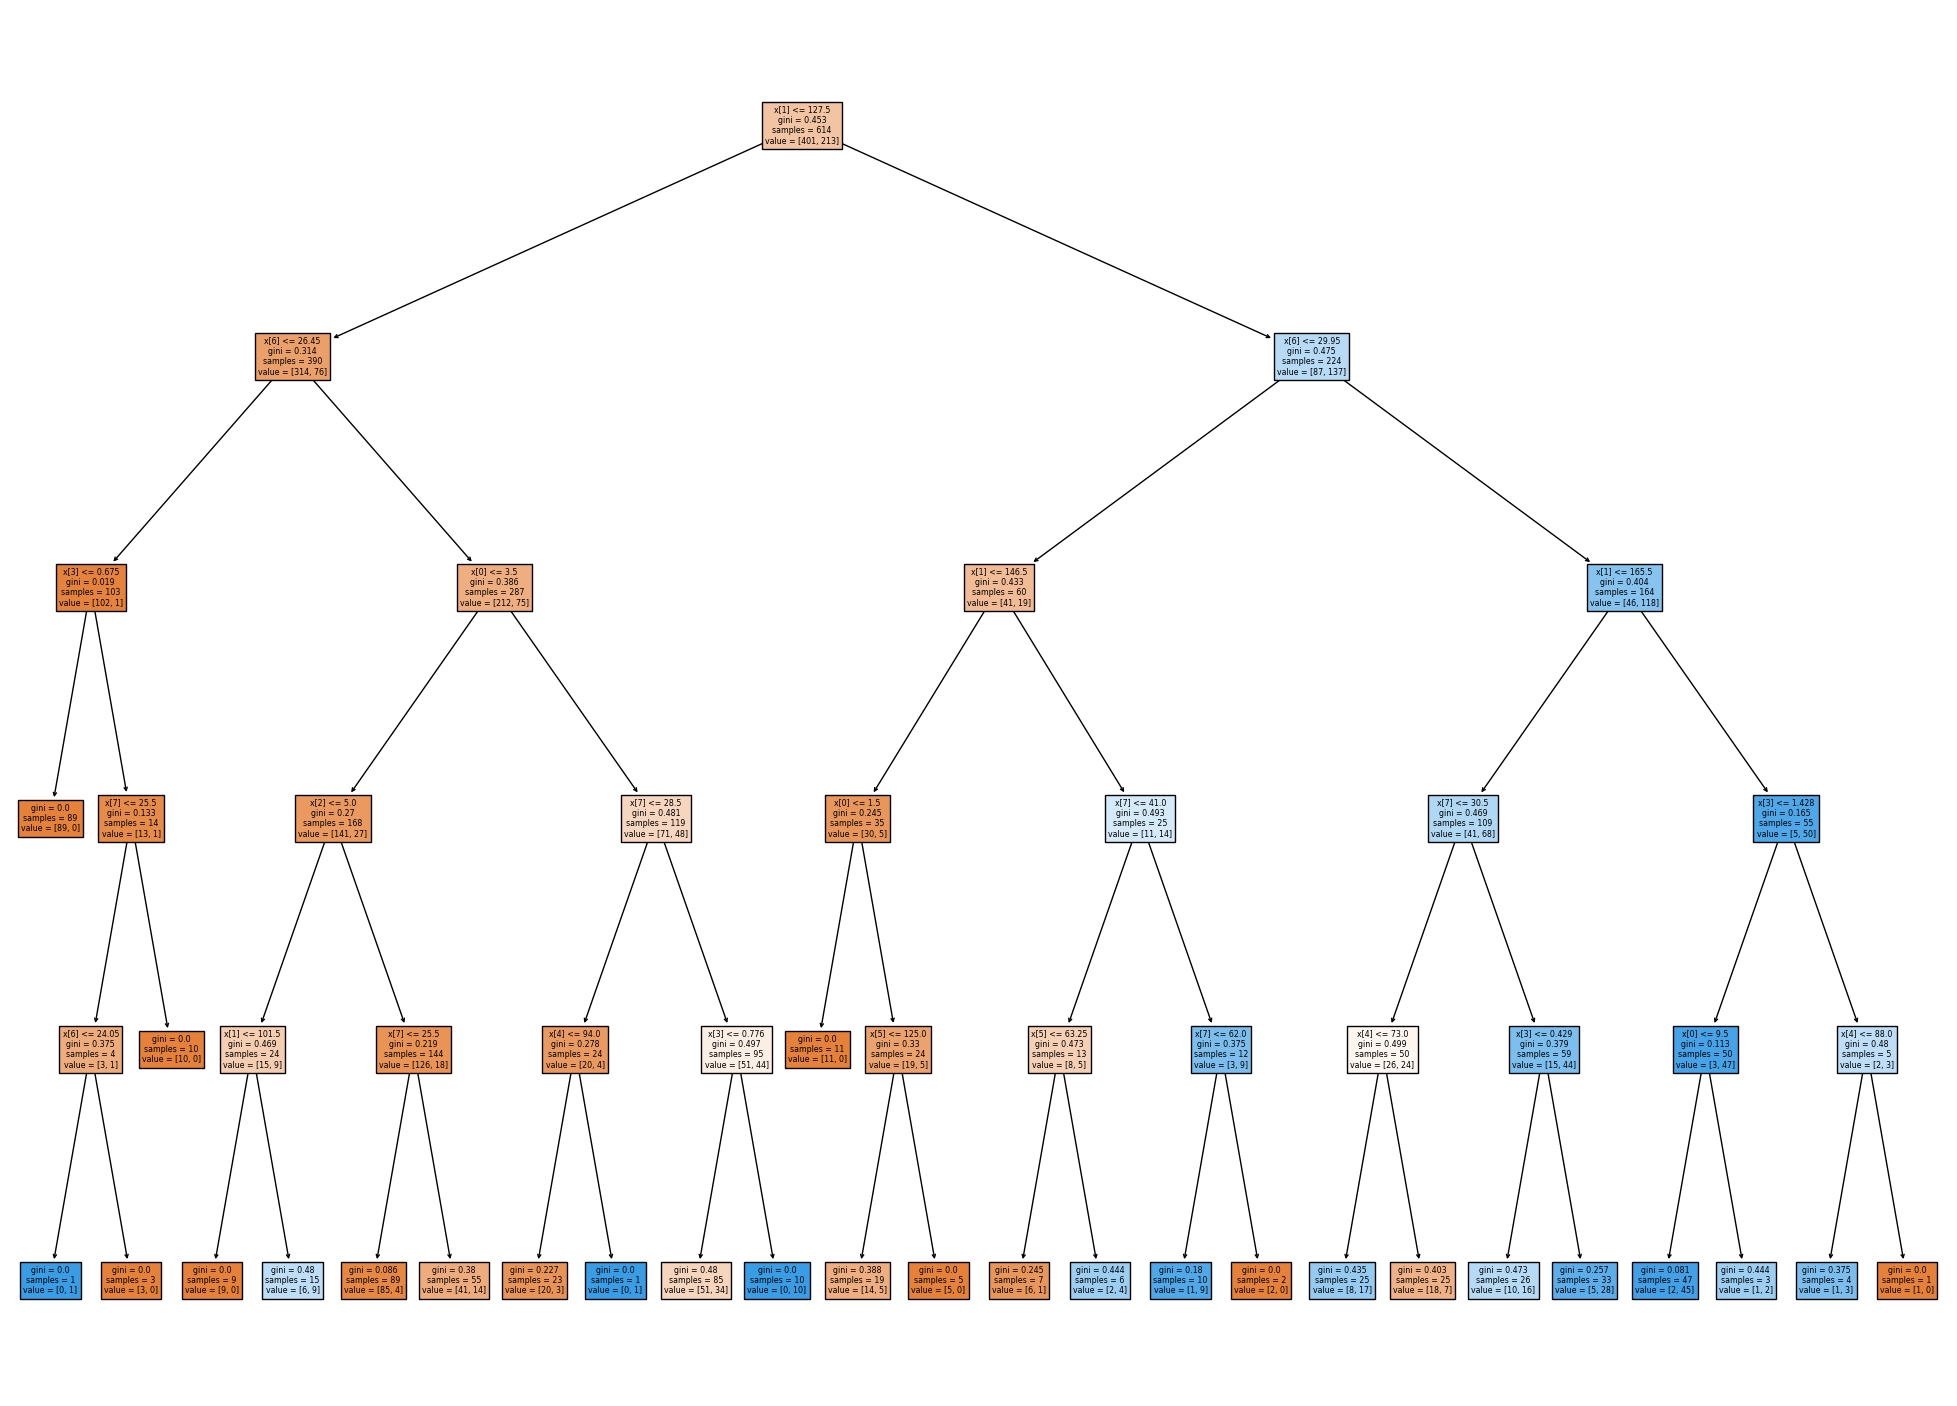

In [51]:
from sklearn import tree

plt.figure(figsize=(25,18))
tree.plot_tree(tree_clf1,filled=True)

In [40]:
y_pred = tree_clf1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [43]:
# Here we will check accuracy and classification report

from sklearn.metrics import classification_report

print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))


0.7727272727272727
[[86 22]
 [13 33]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       108
           1       0.60      0.72      0.65        46

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
y_proba = tree_clf1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

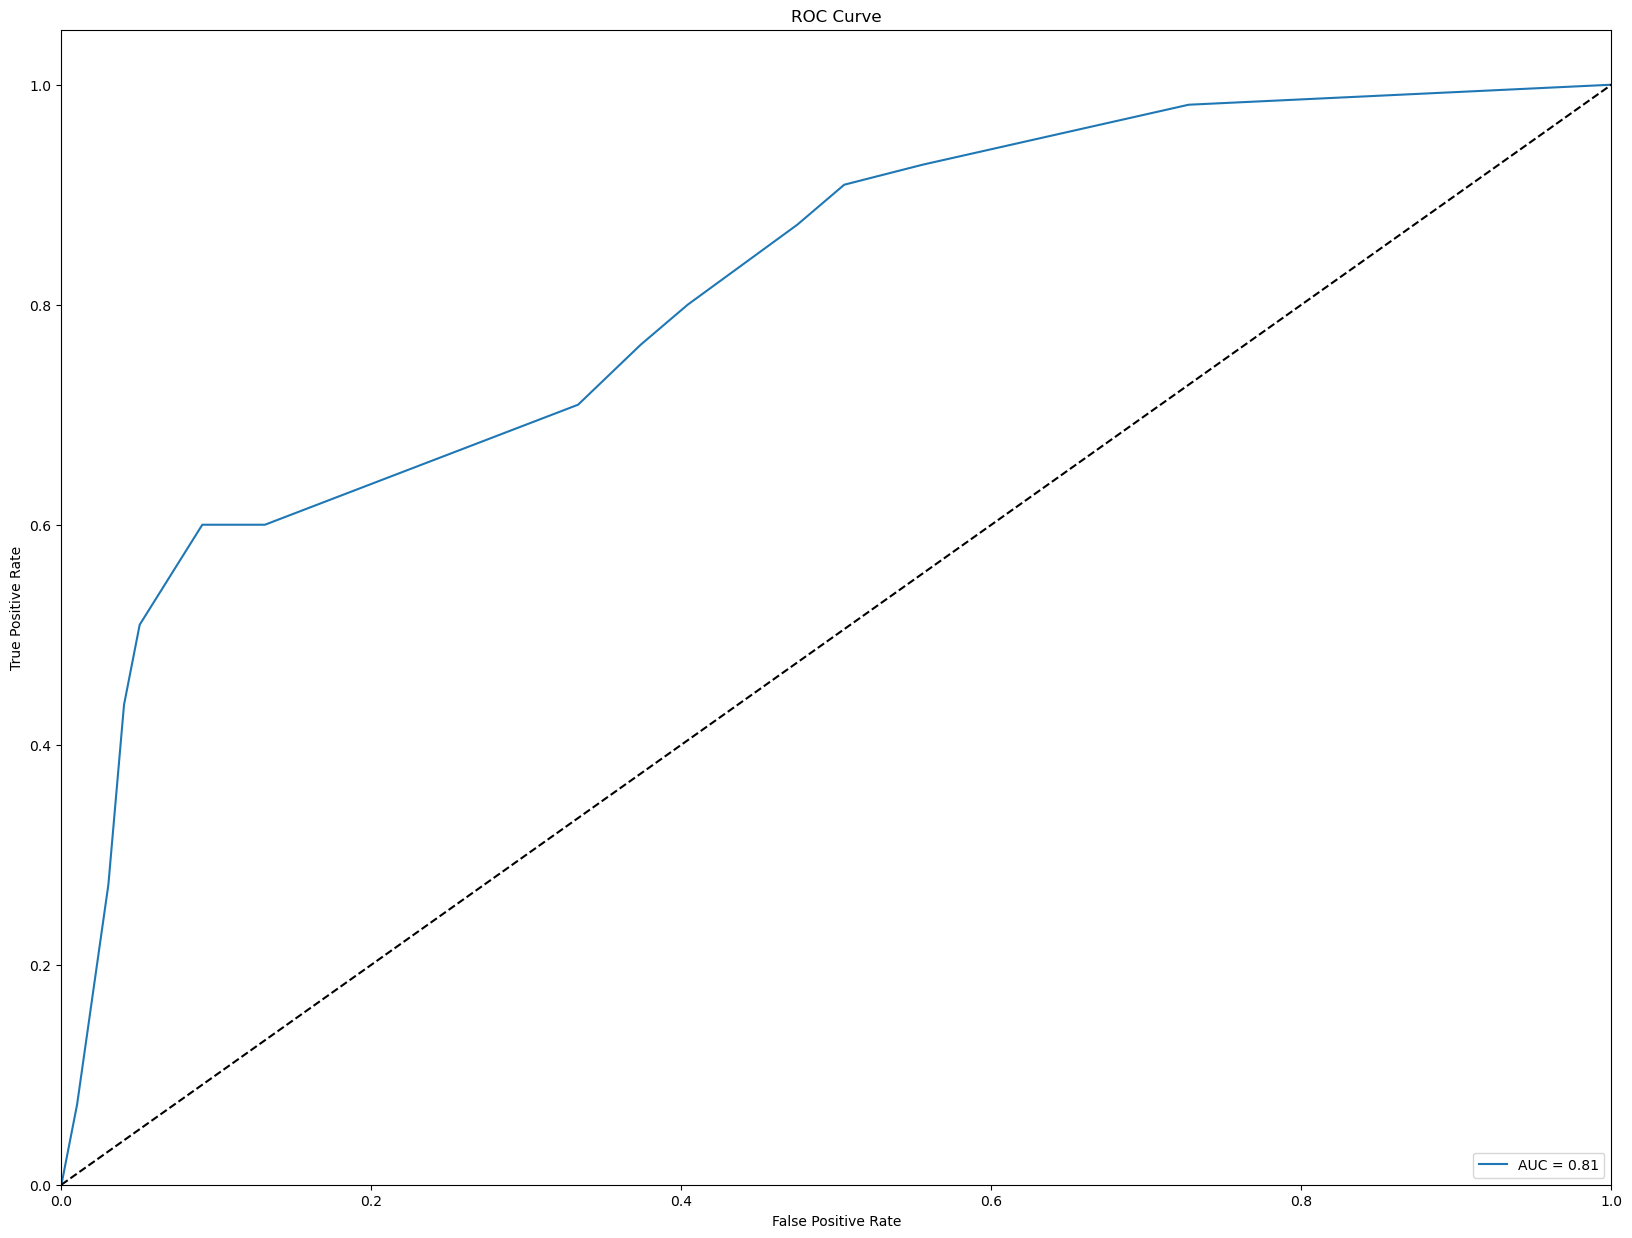

In [47]:
plt.figure(figsize=(20,15))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




Root Node: This is where the decision tree starts. It considers the entire dataset before making any decisions.

Splits and Branches: The tree then makes decisions based on different features like glucose levels, BMI, age, etc. Each split represents a choice based on a feature.

Leaves: These are the end points of the tree. Each leaf represents a final decision, like whether a person is diabetic or not, based on the combination of features.


Important Variables:

Glucose Level: High glucose levels are often linked with diabetes.

BMI (Body Mass Index): High BMI can indicate higher risk for diabetes.

Age: Risk for diabetes often increases with age.

Diabetes Pedigree Function: Family history can influence diabetes risk.

Thresholds:

For example, the tree might split based on glucose levels above or below a certain value, indicating different risk levels.

Similarly, BMI, age, and other factors have thresholds where the risk of diabetes changes.

In [52]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit


In [53]:
# Cross Validation

cv_scores = cross_val_score(tree_clf1 , X , y , cv=5)
print(f"Cross_validation_score: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

Cross_validation_score: [0.69480519 0.67532468 0.68181818 0.7124183  0.7254902 ]
Mean CV score: 0.6979713097360156


In [54]:
# Holdout Validation(splitting)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

tree_clf1.fit(X_train,y_train)

test_accuracy = tree_clf1.score(X_test,y_test)

print(f"Holdout Validation Accuracy: {test_accuracy}")

Holdout Validation Accuracy: 0.7402597402597403


. Sensitivity Analysis

Vary input variables within plausible ranges and observe changes in predictions

Example: Varying glucose levels, BMI, age, etc., and observing changes in predicted probabilities or classes.

. Scenario Testing

Define different scenarios and test the model's performance under each scenario

Example: Simulate changes in disease prevalence, patient demographics, measurement errors, etc.

. Out-of-Distribution Testing

Test the model's performance on data that is different from the training distribution

Example: Use data from a different source or distribution to evaluate model performance in real-world scenarios.